In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ascii_file_counts.csv to ascii_file_counts (1).csv


In [ ]:
# loading data in a pandas dataframe
data = pd.read_csv('/content/ascii_file_counts.csv')
data.head()

,ASCII Value,Character,Number of Files
0,33,!,207
1,34,"""",267
2,35,#,152
3,36,$,192
4,37,%,190


In [ ]:
# displaying distinct labels and total distinct count
print(data['ASCII Value'].unique())
print(len(data['ASCII Value'].unique()))

[ 33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123
 124 125 126 999]
94


In [ ]:
# Assuming the pixel data is in columns other than 'ASCII Value', 'Character', and 'Number of Files'
# Adjust this based on your actual data structure if necessary.
# If the pixel data is in a single column of lists or strings, further processing will be needed.

# Identify pixel columns (assuming all columns except the ones dropped are pixel data)
pixel_columns = [col for col in data.columns if col not in ['ASCII Value', 'Character', 'Number of Files']]

# Extract pixel data
X = data[pixel_columns].values

# Reshape the data to (num_samples, height, width, channels)
# Assuming grayscale images of 28x28 pixels
img_height = 28
img_width = 28
# Check if the number of pixel columns matches the expected image size
if X.shape[1] != img_height * img_width:
    raise ValueError(f"Expected {img_height * img_width} pixel columns, but found {X.shape[1]}. "
                     "Please check your data and column selection.")

X = X.reshape(-1, img_height, img_width, 1)

# Normalize the data
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

ValueError: Expected 784 pixel columns, but found 0. Please check your data and column selection.

In [ ]:
# creating dictionary of values and their respective labels
labels = data['ASCII Value'].unique()
values = [num for num in range(len(data['ASCII Value'].unique()))]
dict_value_label = dict(zip(values,labels))
dict_label_value = dict(zip(labels,values))

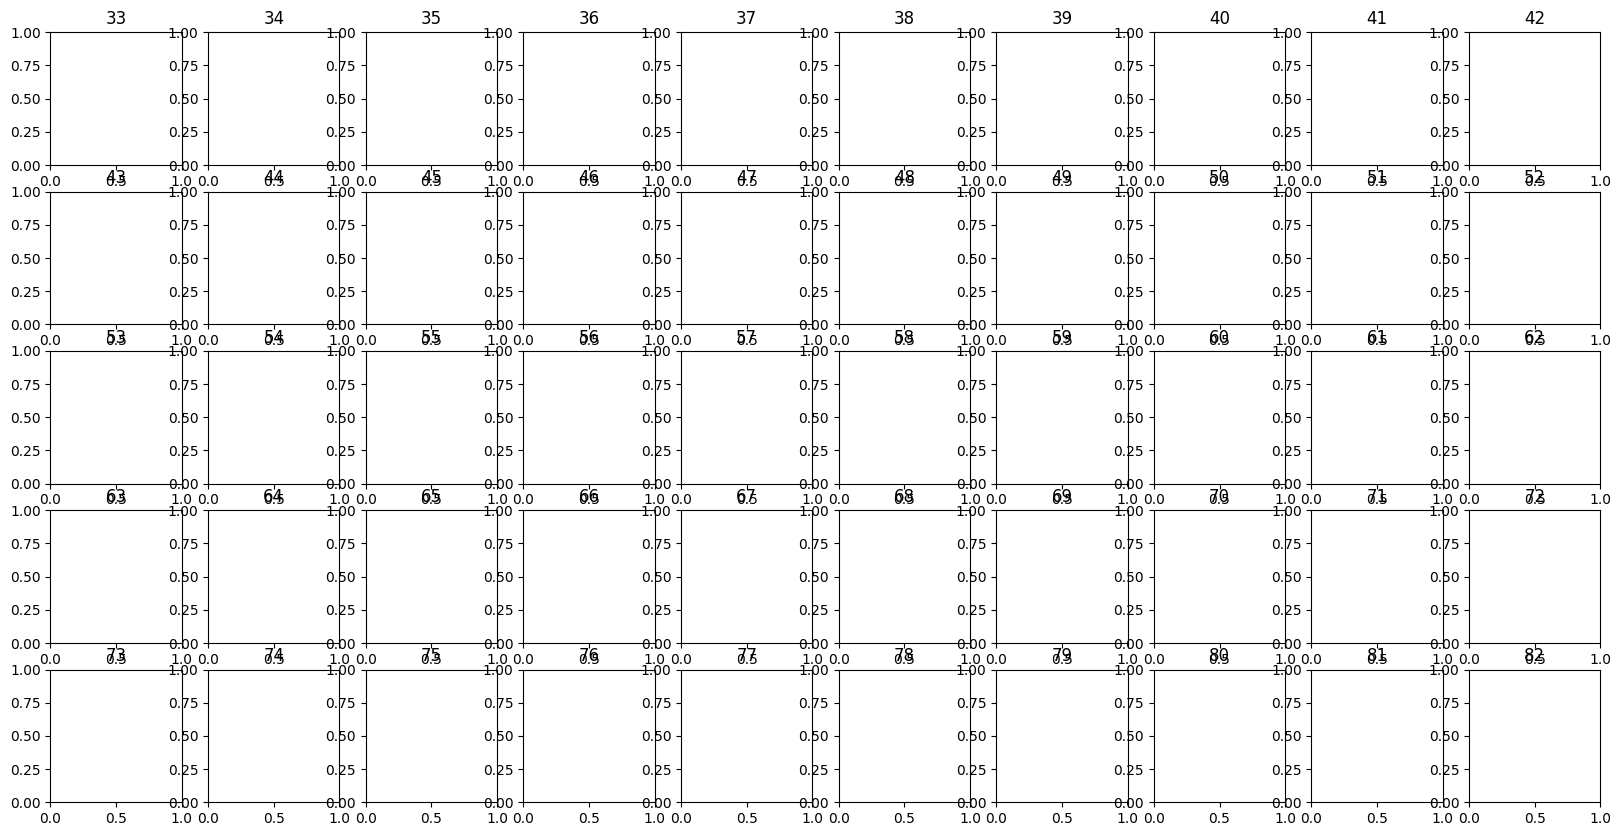

In [ ]:
#plotting some of the values and corresponding labels as title
plt.figure(figsize=(20,10))
for i in range(min(50, len(X))): # Ensure we don't go out of bounds
    plt.subplot(5,10,i+1)
    plt.title(y.iloc[i])
    # Check if X has values before trying to reshape
    if X.values.size > i:
        plt.imshow(X.values[i].reshape(28,28), cmap=plt.get_cmap('Spectral'))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [ ]:
enc = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
y_train = enc.fit_transform(y_train.values.reshape(-1,1))
y_test = enc.fit_transform(y_test.values.reshape(-1,1))
y_train,y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 

In [ ]:
# FIX: Removing the unnecessary/erroneous .values call
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# normalizing the train and test dataset and bringing its range from 0 to 1 by dividing the code by 255
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (0, 28, 28, 1)
X_test shape: (0, 28, 28, 1)


In [ ]:
# Convolutional model
model = Sequential()

# building convolutional layer 1
model.add(Convolution2D(64, (5,5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))

# building convolutional layer 2
model.add(Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))

# building convolutional layer 3
model.add(Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

# fully connected layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

# fully connected layer 2
no_of_classes=data['ASCII Value'].nunique()
model.add(Dense(no_of_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 94)             │        24,158 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,862 (722.12 KB)

 Trainable params: 184,862 (722.12 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128, verbose=1)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("Cast:0", shape=(None, 0), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (None, 0)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 0), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
 y_pred = model.predict(X_test)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("Cast:0", shape=(19, 0), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (19, 0)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(19, 0), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
# # Evaluate
 evaluation = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
 print(f'\nSummary: \n\tLoss over the test dataset: {round(evaluation[0],2)} \n\tAccuracy: {round(evaluation[1]*100,2)}%')

IndentationError: unexpected indent (ipython-input-349587321.py, line 2)

In [ ]:
# plt.figure(figsize=(10, 4))
# plt.subplot(1,2,1)
# epochs=np.arange(100)

# plt.title('Accuracy vs Epochs')
# plt.plot(epochs,history.history['accuracy'],label='train', color='#851D2D')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.plot(epochs,history.history['val_accuracy'],label='test', color='#306844')
# plt.legend()
# plt.subplot(1,2,2)
# plt.title('Loss vs Epochs')
# plt.plot(epochs,history.history['loss'],label='train', color='#851D2D')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.plot(epochs,history.history['val_loss'],label='test', color='#306844')
# plt.legend()
# plt.show()

In [ ]:
import pandas as pd
import numpy as np


# Example placeholder for a 28x28 image (784 pixels) and 5 samples
num_samples = 5
img_height = 28
img_width = 28
num_pixels = img_height * img_width

# Create column names for pixels (e.g., 'pixel_0', 'pixel_1', ...)
pixel_columns = [f'pixel_{i}' for i in range(num_pixels)]

# Generate random pixel data (replace with your actual data loading)
# This creates random integer values between 0 and 255
pixel_data = np.random.randint(0, 256, size=(num_samples, num_pixels))

# Generate some placeholder labels
labels_data = np.random.randint(0, 10, size=(num_samples,)) # Example with 10 classes

# Create the DataFrame
df_image_data = pd.DataFrame(pixel_data, columns=pixel_columns)
df_image_data['label'] = labels_data

print("Placeholder DataFrame head:")
display(df_image_data.head())
# --- End of placeholder creation ---


# 1. Identify Pixel Columns (assuming columns other than 'label' are pixel data)
# Adjust this based on your actual CSV column names
pixel_columns_in_csv = [col for col in df_image_data.columns if col.startswith('pixel')] # Example: columns starting with 'pixel'

# 2. Extract Pixel Data
image_data = df_image_data[pixel_columns_in_csv].values

# 3. Reshape the Data (assuming grayscale images of 28x28)
# Adjust the dimensions based on your image size and color channels
# -1 infers the number of samples
# 28, 28 are height and width
# 1 is the number of color channels (1 for grayscale, 3 for RGB)
image_data_reshaped = image_data.reshape(-1, img_height, img_width, 1)

# 4. Normalize the Data (Optional but Recommended)
image_data_normalized = image_data_reshaped.astype('float32') / 255.0

print("\nReshaped and Normalized Image Data shape:")
print(image_data_normalized.shape)

# You can now use image_data_normalized as your features (X)
# and the 'label' column (after potentially one-hot encoding) as your labels (y)
# Example of getting labels:
image_labels = df_image_data['label'].values
print("\nImage Labels shape:")
print(image_labels.shape)

Placeholder DataFrame head:


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,184,159,38,106,126,0,204,12,178,102,...,64,187,193,200,75,228,29,194,184,8
1,167,242,206,96,3,118,26,156,114,156,...,206,148,150,241,52,195,190,3,152,3
2,62,144,81,215,120,242,102,8,128,228,...,146,30,209,52,132,184,132,76,235,1
3,208,129,8,219,203,134,227,86,95,154,...,85,61,60,211,240,204,84,15,152,2
4,102,41,10,37,136,253,41,174,230,176,...,166,87,117,232,206,80,16,116,16,9



Reshaped and Normalized Image Data shape:
(5, 28, 28, 1)

Image Labels shape:
(5,)


NameError: name 'history' is not defined

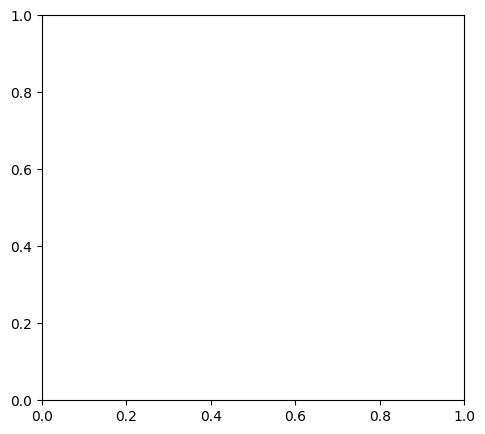

In [ ]:
# Plotting the loss and accuracy over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# ... (Model Definition and Compilation remain the same)

batch_size = 64 # Define your batch size

# Train the model (Data is split into batches automatically by Keras)
print("\n--- Training Model ---")
model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=batch_size # Explicitly set the batch size
)

# Check the model accuracy on the test data (Evaluation is also batched)
print("\n--- Model Evaluation ---")
val_loss, val_acc = model.evaluate(
    test_image,
    test_labels,
    batch_size=batch_size, # Explicitly set the batch size
    verbose=0
)
print(f'Test accuracy: {val_acc:.4f}')


--- Training Model ---


NameError: name 'model' is not defined

In [ ]:
# --- Inference Block ---

def predict_digit(model, image_array, true_label):
    """Makes a prediction and visualizes the result."""

    # Keras models expect a batch dimension: (1, 28, 28)
    image_for_prediction = np.expand_dims(image_array, axis=0)

    # Get the raw probability predictions
    probabilities = model.predict(image_for_prediction, verbose=0)

    # The prediction is the index with the highest probability
    predicted_label = np.argmax(probabilities[0])

    # Visualization
    plt.figure()
    plt.imshow(image_array, cmap='grey')
    plt.title(f"Predicted: {predicted_label} | True: {true_label} | Confidence: {probabilities[0][predicted_label]*100:.2f}%")
    plt.axis('off')
    plt.show()

    return predicted_label

# Example Inference on a specific test image (e.g., the 42nd image)
sample_index = 42
predicted = predict_digit(my_model, test_image[sample_index], test_labels[sample_index])

print(f"\n--- Inference Result ---")
print(f"Prediction for test image {sample_index}: {predicted}")
print(f"Actual label: {test_labels[sample_index]}")

NameError: name 'my_model' is not defined

# Task
Execute the code to train and evaluate the convolutional model.

## Define the model

### Subtask:
Execute the cell `Cf30RA47ZftC` to define the convolutional model.


**Reasoning**:
The subtask is to execute cell `Cf30RA47ZftC` to define the convolutional model. This cell defines the Keras sequential model.



In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=128, verbose=1)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("Cast:0", shape=(None, 0), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (None, 0)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 0), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
# train the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("Cast:0", shape=(None, 0), dtype=float32). Expected shape (None, 28, 28, 1), but input has incompatible shape (None, 0)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 0), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>